In [41]:
import pandas as pd
import numpy as np
import plotly.express as px

sber_data = pd.read_csv('data/sber_data.csv')
display(sber_data)
# fig = px.box(data_frame = sber_data, x = 'price_doc', y = 'ecology', orientation='h')
# # fig.show()

# fig_2 = px.scatter(data_frame=sber_data, x = 'price_doc', y= 'kremlin_km')


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000


<Axes: title={'center': 'Распределение пропусков в данных'}>

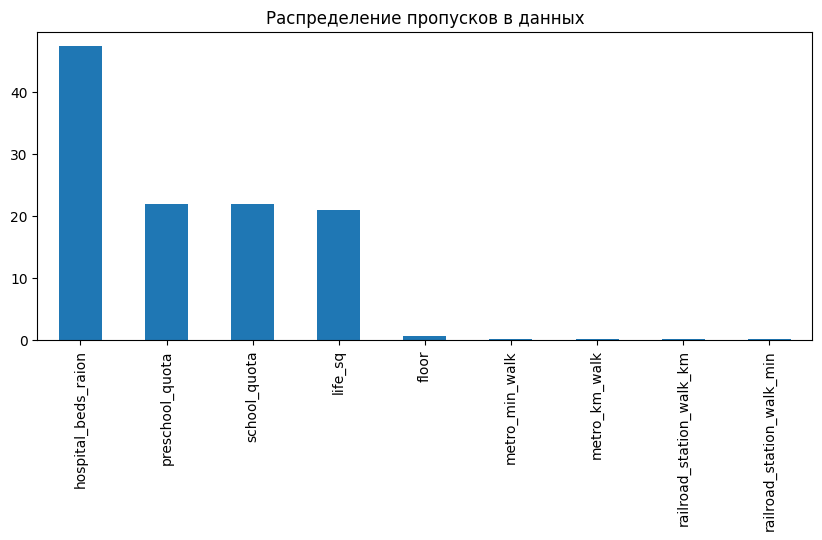

In [42]:
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)


cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
)

# fig_3 = px.imshow(img = sber_data.isnull())
# fig_3.show()

In [43]:
nulls = sber_data.isnull().sum().sort_values(ascending = False)
nulls = nulls[nulls>0]


In [44]:
fig_4 = px.box(data_frame= sber_data, x= 'full_sq')
fig_4.show()

In [45]:
def outliers_iqr_mod(data, feature, left = 1.5, right = 1.5, log_scale = False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', left = 1, right = 6)

print(outliers.shape[0], cleaned.shape[0])

59 30412


In [46]:
def outliers_z_score_mode(data, feature, left = 3, right = 3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers1 = data[(x < lower_bound) | (x > upper_bound)]
    cleaned1 = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers1, cleaned1

outliers1, cleaned1 = outliers_z_score_mode(sber_data, "mkad_km", left = 3, right = 3.5, log_scale=False)

print(outliers1.shape[0], cleaned1.shape[0])

191 30280


In [47]:
outliers2, cleaned2 = outliers_z_score_mode(sber_data, "price_doc", left = 3.7, right = 3.7, log_scale=True)

print(outliers2.shape[0])

52


In [48]:
outliners3, cleaned3 = outliers_iqr_mod(sber_data, "price_doc", left = 3, right = 3, log_scale = True)
print(outliners3.shape[0])

92
